                                        Consumo de APIs - Resultado en tabla plana

Test:

1.- Consumir la API http://numbersapi.com/1..10

2.- Crear un dataFrame con los 1000 primeros números y descripciones

3.- Grabar la tabla en formato CSV

4.- Crear nueva columna con la longitud de la descripcion

5.- Mostrar en un histograma la distribución de longitudes de descripción


In [26]:
#__IMPORTAMOS TODAS LAS LIBRERIAS NECESARIAS__
import pandas as pd
import csv
import requests
import re
import ast
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import sys
import numpy as np


In [27]:
# 1.- Consumir la API http://numbersapi.com/1..10
APIurl = "http://numbersapi.com/1..10000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
APIresp.text

True
200
0:00:00.378243


'{\n "1": "1 is the number of dimensions of a line.",\n "2": "2 is the number of polynucleotide strands in a DNA double helix.",\n "3": "3 is number of performers in a trio.",\n "4": "4 is the number of movements in a symphony.",\n "5": "5 is the number of Justices on the Supreme Court of the United States necessary to render a majority decision.",\n "6": "6 is the jersey number worn by the starting stand-off half/five-eighth in most rugby league competitions.",\n "7": "7 is the number of days in a week.",\n "8": "8 is the number of planets in the Solar System.",\n "9": "9 is the number of innings in a regulation, non-tied game of baseball.",\n "10": "10 is the Number of dots in a tetractys.",\n "11": "11 is the number of pounds one gallon of pure maple syrup weighs.",\n "12": "12 is the number of function keys on most PC keyboards (F1 through F12).",\n "13": "13 is the speed of rush hour traffic on average in kilometres per hour in London.",\n "14": "14 is the number of muqatta\'at in

In [28]:
# 2.- Crear un dataFrame con los 1000 primeros números y descripciones
x = ast.literal_eval(APIresp.text)

# 3.- Grabar la tabla en formato CSV
# 4.- Crear nueva columna con la longitud de la descripcion
df = pd.DataFrame([[key, x[key]] for key in x.keys()], columns=['Number', 'Description'])
df

,Number,Description
0,1,1 is the number of dimensions of a line.
1,2,2 is the number of polynucleotide strands in a...
2,3,3 is number of performers in a trio.
3,4,4 is the number of movements in a symphony.
4,5,5 is the number of Justices on the Supreme Cou...
...,...,...
95,96,96 is the rating of Skyrim on metacritic.com.
96,97,97 is the number of minutes it takes the Hubbl...
97,98,98 is the temperature (F) of the normal body.
98,99,99 is the highest jersey number allowed in mos...


In [29]:
# Rename dataFrame columns
df.rename( columns={"Number" :'numero'}, inplace=True)
df.rename( columns={"Description" :'descripcion'}, inplace=True)

# Convert string to float
print (df.dtypes)
df.numero = df.numero.astype(float)
print (df.dtypes)

df

numero         object
descripcion    object
dtype: object
numero         float64
descripcion     object
dtype: object


,numero,descripcion
0,1.0,1 is the number of dimensions of a line.
1,2.0,2 is the number of polynucleotide strands in a...
2,3.0,3 is number of performers in a trio.
3,4.0,4 is the number of movements in a symphony.
4,5.0,5 is the number of Justices on the Supreme Cou...
...,...,...
95,96.0,96 is the rating of Skyrim on metacritic.com.
96,97.0,97 is the number of minutes it takes the Hubbl...
97,98.0,98 is the temperature (F) of the normal body.
98,99.0,99 is the highest jersey number allowed in mos...


In [25]:
lenDescrip = []
for i in df['descripcion']:
    lenDescrip.append(len(i))
lenDescrip

[40,
 131,
 71,
 63,
 47,
 69,
 78,
 44,
 70,
 60,
 97,
 52,
 41,
 38,
 61,
 137,
 69,
 57,
 43,
 75,
 94,
 70,
 52,
 73,
 77,
 61,
 101,
 62,
 68,
 119,
 87,
 85,
 73,
 93,
 81,
 90,
 142,
 145,
 122,
 108,
 100,
 80,
 103,
 57,
 60,
 98,
 111,
 45,
 85,
 58,
 36,
 60,
 66,
 60,
 115,
 111,
 85,
 81,
 165,
 50,
 73,
 63,
 79,
 84,
 92,
 86,
 131,
 100,
 49,
 77,
 120,
 70,
 79,
 36,
 99,
 34,
 35,
 36,
 91,
 62,
 53,
 32,
 35,
 36,
 46,
 94,
 161,
 76,
 36,
 56,
 66,
 90,
 37,
 37,
 105,
 45,
 102,
 134,
 53,
 63]

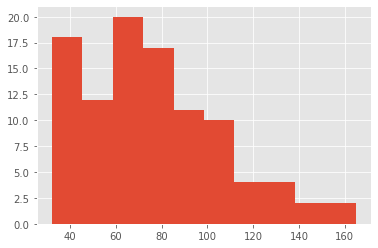

In [31]:
plt.style.use('ggplot')
plt.hist(lenDescrip, bins=10)
plt.show()

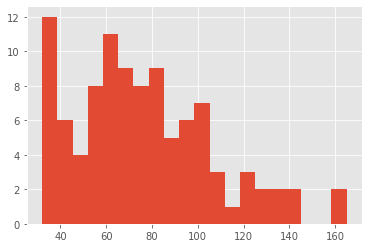

In [35]:
plt.hist(lenDescrip, bins=20)
plt.show()

In [37]:
# Grabamos el resultado como CSV separado por comas
CSVfilename = "numbers1000.csv"
df.to_csv(CSVfilename, index=False)